In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os
import math
from scipy.stats import norm

In [2]:
os.getcwd()
os.chdir('/content/sample_data')

In [3]:
df1=pd.read_csv('aerofit_treadmill.csv')
df1.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
df1.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


# Exploratory Data Anlaysis

In [5]:
df1.shape

(180, 9)

In [6]:
df1['Product'].value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


<Axes: ylabel='count'>

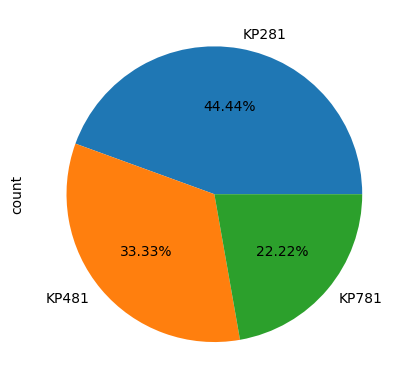

In [7]:

df1['Product'].value_counts().plot.pie(autopct='%.2f%%')

In [8]:
df1.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


In [9]:
df1['Usage'].value_counts()

,count
Usage,
3,69
4,52
2,33
5,17
6,7
7,2


In [10]:
df1['Fitness'].value_counts()

,count
Fitness,
3,97
5,31
2,26
4,24
1,2


In [11]:
df1['Education'].value_counts()

,count
Education,
16,85
14,55
18,23
15,5
13,5
12,3
21,3
20,1


#### Observation
1. Since the value of Education,Usage and Fitness doesnt have much variance so it can be treated as categorical value.

In [12]:
df_KP781=df1[df1['Product']=='KP781'].copy()
df_KP281=df1[df1['Product']=='KP281'].copy()
df_KP481=df1[df1['Product']=='KP481'].copy()

# 1.Age

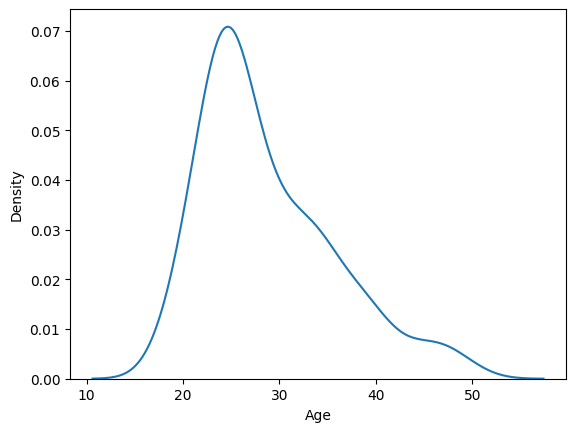

In [13]:
sns.kdeplot(data=df1,x='Age', common_norm=False)

plt.show()

In [14]:
print('Age Analysis whole dataset')
mean_age=np.mean(df1['Age'])
std_age=np.std(df1['Age'])
zscore20=(20-mean_age)/std_age
zscore40=(40-mean_age)/std_age
print("Mean\t",mean_age)
print("Std\t",std_age)
print("Zscore20\t",zscore20)
print("Zscore40\t",zscore40)
CI90=list(norm.interval(confidence=0.90,loc=mean_age,scale=std_age))
P20_40=norm.cdf(zscore40)-norm.cdf(zscore20)
print("CI 90%\t",CI90)
print('Probability between 20 and 40\t',P20_40)

Age Analysis whole dataset
Mean	 28.788888888888888
Std	 6.924183777720975
Zscore20	 -1.2693032379018776
Zscore40	 1.619123852140322
CI 90%	 [np.float64(17.39962008842599), np.float64(40.17815768935178)]
Probability between 20 and 40	 0.8451232251488521


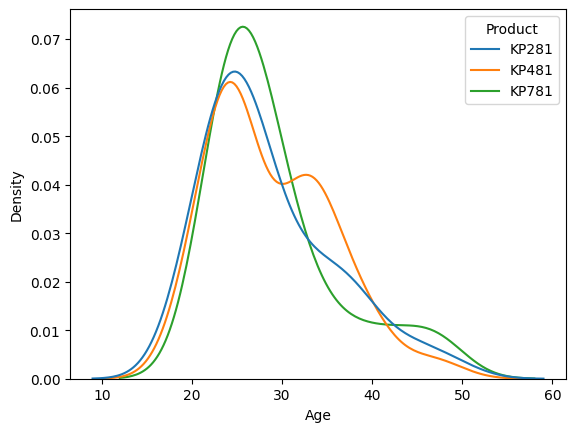

In [15]:


sns.kdeplot(data=df1,x='Age',hue='Product', common_norm=False)

plt.show()

In [16]:
print('Overall')
print('Age Analysis for KP281')
mean_age=np.mean(df_KP281['Age'])
std_age=np.std(df_KP281['Age'])
zscore20=(20-mean_age)/std_age
zscore40=(40-mean_age)/std_age
print("Mean\t",mean_age)
print("Std\t",std_age)
print("Zscore20\t",zscore20)
print("Zscore40\t",zscore40)
CI90=norm.interval(confidence=0.90,loc=mean_age,scale=std_age)
P20_40=norm.cdf(zscore40)-norm.cdf(zscore20)
print("CI 90%\t",CI90)
print('Probability between 20 and 40\t',P20_40)

print('\n \n  Male \n')
print('Age Analysis for KP281')
mean_age=np.mean(df_KP281['Age'][df_KP281['Gender']=='Male'])
std_age=np.std(df_KP281['Age'][df_KP281['Gender']=='Male'])
zscore20=(20-mean_age)/std_age
zscore40=(40-mean_age)/std_age
print("Mean\t",mean_age)
print("Std\t",std_age)
print("Zscore20\t",zscore20)
print("Zscore40\t",zscore40)
CI90=norm.interval(confidence=0.90,loc=mean_age,scale=std_age)
P20_40=norm.cdf(zscore40)-norm.cdf(zscore20)
print("CI 90%\t",CI90)
print('Probability between 20 and 40\t',P20_40)

print('\n \n  Female \n')
print('Age Analysis for KP281')
mean_age=np.mean(df_KP281['Age'][df_KP281['Gender']=='Female'])
std_age=np.std(df_KP281['Age'][df_KP281['Gender']=='Female'])
zscore20=(20-mean_age)/std_age
zscore40=(40-mean_age)/std_age
print("Mean\t",mean_age)
print("Std\t",std_age)
print("Zscore20\t",zscore20)
print("Zscore40\t",zscore40)
CI90=norm.interval(confidence=0.90,loc=mean_age,scale=std_age)
P20_40=norm.cdf(zscore40)-norm.cdf(zscore20)
print("CI 90%\t",CI90)
print('Probability between 20 and 40\t',P20_40)

Overall
Age Analysis for KP281
Mean	 28.55
Std	 7.176175861836164
Zscore20	 -1.1914423732938335
Zscore40	 1.5955573303174728
CI 90%	 (np.float64(16.746241106017173), np.float64(40.35375889398282))
Probability between 20 and 40	 0.8279661863918395

 
  Male 

Age Analysis for KP281
Mean	 28.65
Std	 7.326493021903454
Zscore20	 -1.1806467260856943
Zscore40	 1.5491722937656225
CI 90%	 (np.float64(16.598991380087448), np.float64(40.70100861991255))
Probability between 20 and 40	 0.8204582995067331

 
  Female 

Age Analysis for KP281
Mean	 28.45
Std	 7.021217843081071
Zscore20	 -1.203494919093971
Zscore40	 1.6450137651521146
CI 90%	 (np.float64(16.901124365191702), np.float64(39.99887563480829))
Probability between 20 and 40	 0.8356240855939796


In [17]:
print('Overall')
print('Age Analysis for KP481')
mean_age=np.mean(df_KP481['Age'])
std_age=np.std(df_KP481['Age'])
zscore20=(20-mean_age)/std_age
zscore40=(40-mean_age)/std_age
print("Mean\t",mean_age)
print("Std\t",std_age)
print("Zscore20\t",zscore20)
print("Zscore40\t",zscore40)
CI90=norm.interval(confidence=0.90,loc=mean_age,scale=std_age)
P20_40=norm.cdf(zscore40)-norm.cdf(zscore20)
print("CI 90%\t",CI90)
print('Probability between 20 and 40\t',P20_40)

print('\n \n  Male \n')
print('Age Analysis for KP481')
mean_age=np.mean(df_KP481['Age'][df_KP481['Gender']=='Male'])
std_age=np.std(df_KP481['Age'][df_KP481['Gender']=='Male'])
zscore20=(20-mean_age)/std_age
zscore40=(40-mean_age)/std_age
print("Mean\t",mean_age)
print("Std\t",std_age)
print("Zscore20\t",zscore20)
print("Zscore40\t",zscore40)
CI90=norm.interval(confidence=0.90,loc=mean_age,scale=std_age)
P20_40=norm.cdf(zscore40)-norm.cdf(zscore20)
print("CI 90%\t",CI90)
print('Probability between 20 and 40\t',P20_40)

print('\n \n  Female \n')
print('Age Analysis for KP481')
mean_age=np.mean(df_KP481['Age'][df_KP481['Gender']=='Female'])
std_age=np.std(df_KP481['Age'][df_KP481['Gender']=='Female'])
zscore20=(20-mean_age)/std_age
zscore40=(40-mean_age)/std_age
print("Mean\t",mean_age)
print("Std\t",std_age)
print("Zscore20\t",zscore20)
print("Zscore40\t",zscore40)
CI90=norm.interval(confidence=0.90,loc=mean_age,scale=std_age)
P20_40=norm.cdf(zscore40)-norm.cdf(zscore20)
print("CI 90%\t",CI90)
print('Probability between 20 and 40\t',P20_40)

Overall
Age Analysis for KP481
Mean	 28.9
Std	 6.58963833099612
Zscore20	 -1.350605230963356
Zscore40	 1.6844627037857591
CI 90%	 (np.float64(18.06100949096258), np.float64(39.738990509037414))
Probability between 20 and 40	 0.8655428971266357

 
  Male 

Age Analysis for KP481
Mean	 28.70967741935484
Std	 7.318529503219216
Zscore20	 -1.1900857153781639
Zscore40	 1.5427037051198418
CI 90%	 (np.float64(16.67176762203335), np.float64(40.74758721667632))
Probability between 20 and 40	 0.8215423066925518

 
  Female 

Age Analysis for KP481
Mean	 29.103448275862068
Std	 5.701450677988149
Zscore20	 -1.5966898233476203
Zscore40	 1.9111893340070008
CI 90%	 (np.float64(19.725396449288326), np.float64(38.4815001024358))
Probability between 20 and 40	 0.9168424403541635


In [18]:
print('Overall')
print('Age Analysis for KP781')
mean_age=np.mean(df_KP781['Age'])
std_age=np.std(df_KP781['Age'])
zscore20=(20-mean_age)/std_age
zscore40=(40-mean_age)/std_age
print("Mean\t",mean_age)
print("Std\t",std_age)
print("Zscore20\t",zscore20)
print("Zscore40\t",zscore40)
CI90=norm.interval(confidence=0.90,loc=mean_age,scale=std_age)
P20_40=norm.cdf(zscore40)-norm.cdf(zscore20)
print("CI 90%\t",CI90)
print('Probability between 20 and 40\t',P20_40)

print('\n \n  Male \n')
print('Age Analysis for KP781')
mean_age=np.mean(df_KP781['Age'][df_KP781['Gender']=='Male'])
std_age=np.std(df_KP781['Age'][df_KP781['Gender']=='Male'])
zscore20=(20-mean_age)/std_age
zscore40=(40-mean_age)/std_age
print("Mean\t",mean_age)
print("Std\t",std_age)
print("Zscore20\t",zscore20)
print("Zscore40\t",zscore40)
CI90=norm.interval(confidence=0.90,loc=mean_age,scale=std_age)
P20_40=norm.cdf(zscore40)-norm.cdf(zscore20)
print("CI 90%\t",CI90)
print('Probability between 20 and 40\t',P20_40)

print('\n \n  Female \n')
print('Age Analysis for KP781')
mean_age=np.mean(df_KP781['Age'][df_KP781['Gender']=='Female'])
std_age=np.std(df_KP781['Age'][df_KP781['Gender']=='Female'])
zscore20=(20-mean_age)/std_age
zscore40=(40-mean_age)/std_age
print("Mean\t",mean_age)
print("Std\t",std_age)
print("Zscore20\t",zscore20)
print("Zscore40\t",zscore40)
CI90=norm.interval(confidence=0.90,loc=mean_age,scale=std_age)
P20_40=norm.cdf(zscore40)-norm.cdf(zscore20)
print("CI 90%\t",CI90)
print('Probability between 20 and 40\t',P20_40)

Overall
Age Analysis for KP781
Mean	 29.1
Std	 6.884039511798287
Zscore20	 -1.3218982814383715
Zscore40	 1.5833726667778292
CI 90%	 (np.float64(17.776762640941342), np.float64(40.42323735905865))
Probability between 20 and 40	 0.8502307130467166

 
  Male 

Age Analysis for KP781
Mean	 29.545454545454547
Std	 7.348844102433612
Zscore20	 -1.2989055710534823
Zscore40	 1.4226108635347658
CI 90%	 (np.float64(17.45768166966568), np.float64(41.63322742124341))
Probability between 20 and 40	 0.8255873347129621

 
  Female 

Age Analysis for KP781
Mean	 27.0
Std	 3.295017884191656
Zscore20	 -2.124419425334094
Zscore40	 3.945350361334746
CI 90%	 (np.float64(21.580177882317386), np.float64(32.419822117682614))
Probability between 20 and 40	 0.9831426147673061


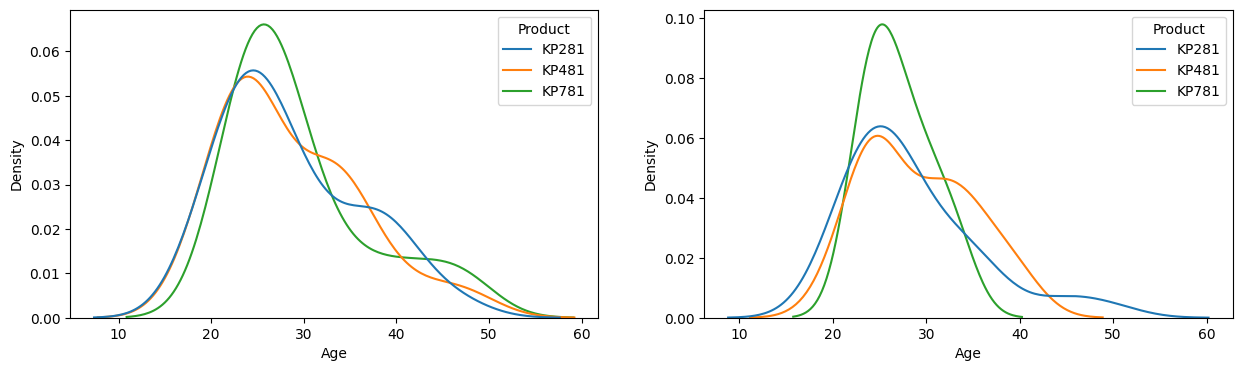

In [19]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)

sns.kdeplot(data=df1[df1['Gender']=='Male'],x='Age',hue='Product', common_norm=False)

plt.subplot(1,2,2)
sns.kdeplot(data=df1[df1['Gender']=='Female'],x='Age',hue='Product',  common_norm=False)

plt.show()

In [20]:
df1

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


### 1. Age vs Education vs Product

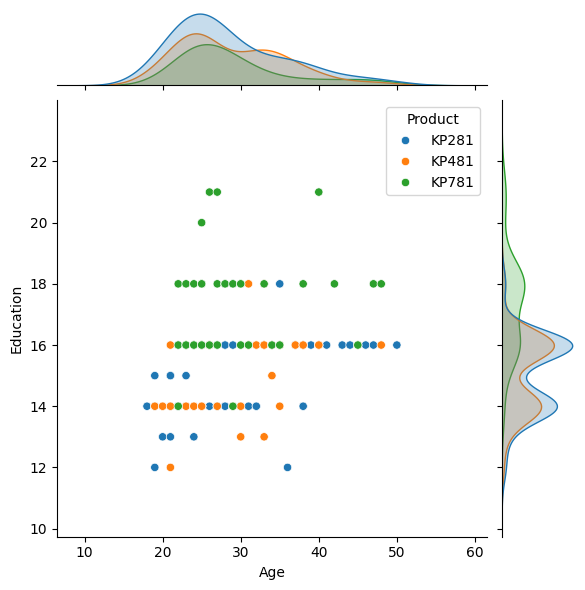

In [21]:
sns.jointplot(data=df1,x='Age',y='Education',hue='Product')
plt.show()

### 2. Age vs Gender vs Product

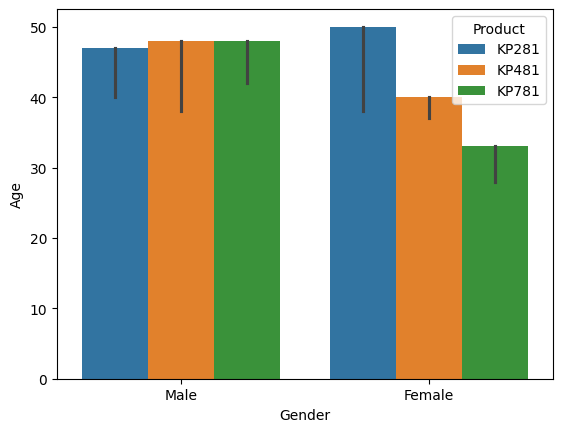

In [22]:
sns.barplot(data=df1,x='Gender',y='Age',estimator='max',hue='Product')
plt.show()

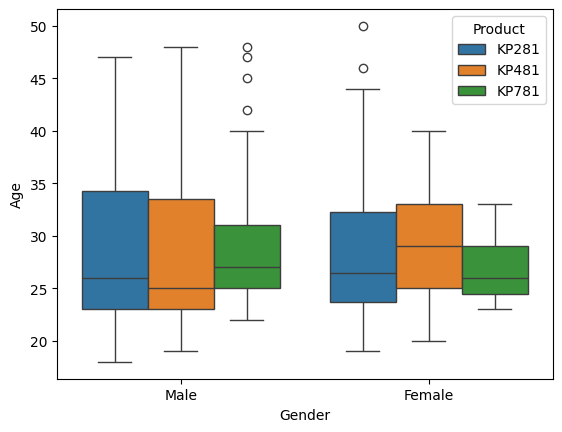

In [23]:
sns.boxplot(data=df1,x='Gender',y='Age',hue='Product')
plt.show()

### 3. Age vs Marital Status vs Product

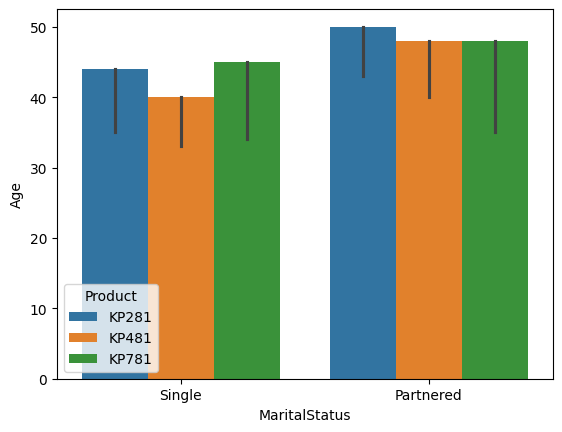

In [24]:
sns.barplot(data=df1,x='MaritalStatus',y='Age',estimator='max',hue='Product')
plt.show()

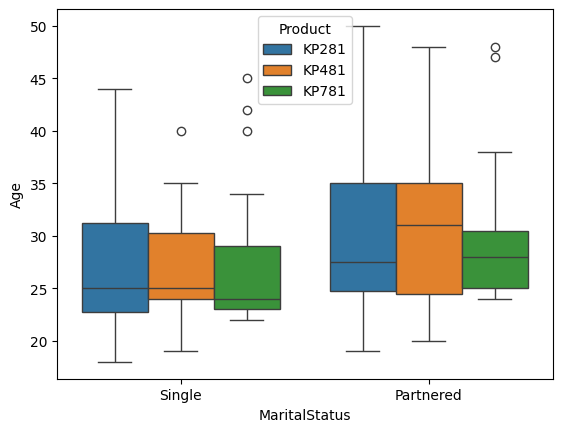

In [25]:
sns.boxplot(data=df1,x='MaritalStatus',y='Age',hue='Product')
plt.show()

In [26]:
pd.crosstab(df1['Age'],df1['MaritalStatus'])

MaritalStatus,Partnered,Single
Age,,
18,0,1
19,1,3
20,3,2
21,5,2
22,1,6
23,9,9
24,3,9
25,18,7
26,7,5


### 4. Age vs Usage vs Product





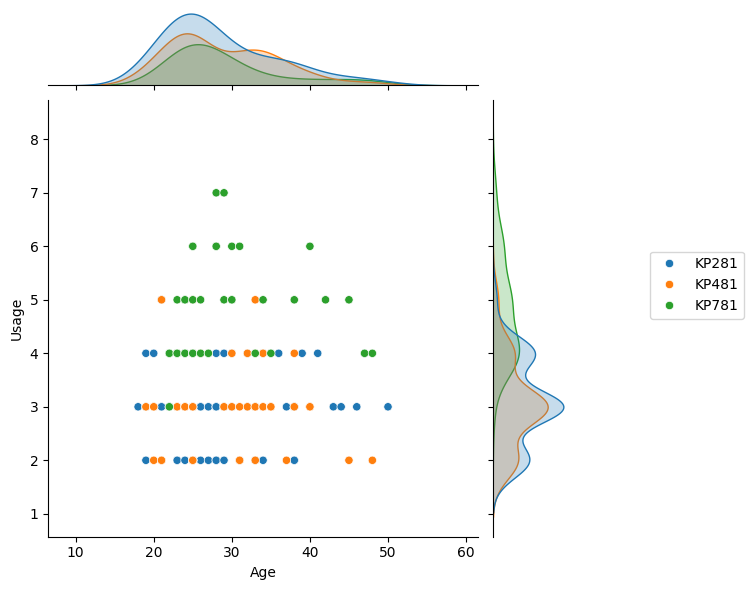

In [27]:
sns.jointplot(data=df1,x='Age',y='Usage',hue='Product')
plt.legend(loc=(1.4,.5))
plt.show()

### 5. Age vs Fitness vs Product

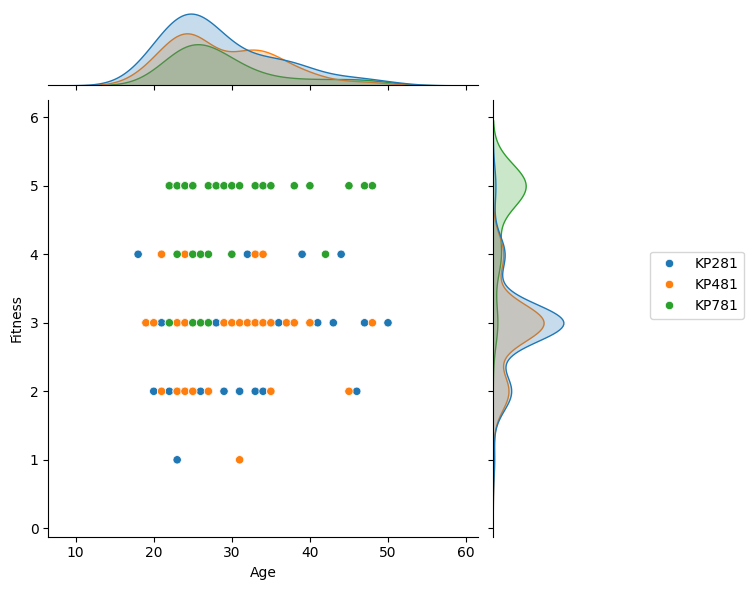

In [28]:
sns.jointplot(data=df1,x='Age',y='Fitness',hue='Product')
plt.legend(loc=(1.4,.5))
plt.show()

### 6. Age vs Income vs Product

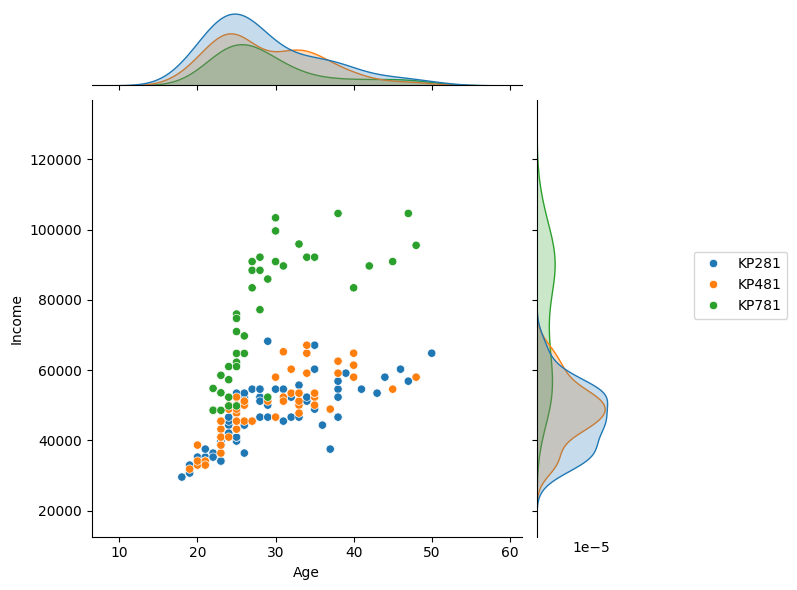

In [29]:
sns.jointplot(data=df1,x='Age',y='Income',hue='Product')
plt.legend(loc=(1.4,.5))
plt.show()

### 7. Age vs Miles vs Product

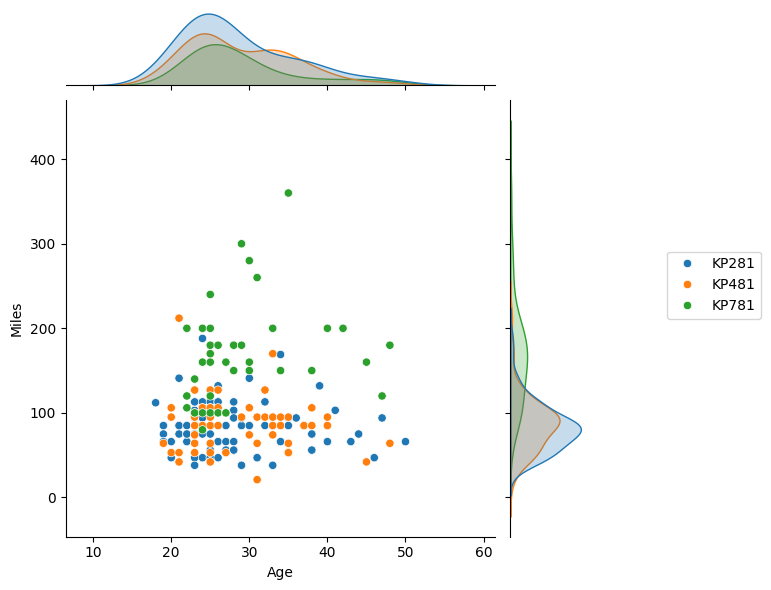

In [30]:
sns.jointplot(data=df1,x='Age',y='Miles',hue='Product')
plt.legend(loc=(1.4,.5))
plt.show()

# 2.Gender

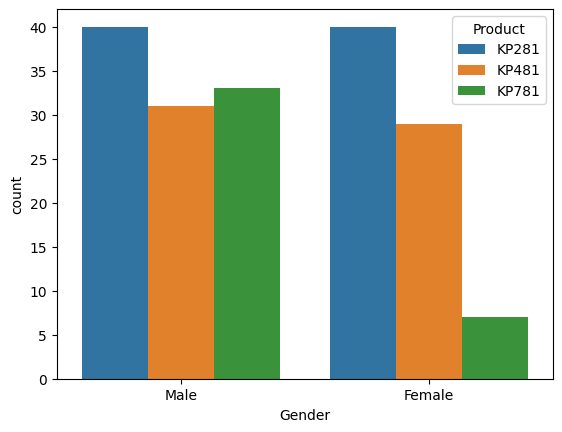

In [31]:
sns.countplot(data=df1,x='Gender',hue='Product')
plt.show()

In [32]:
df2=pd.crosstab(df1['Gender'],df1['Product'],margins=True)
df2

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [33]:



 ##📌 Step 3: Create a two-way contingency table (Country vs Genre)
contingency_table = pd.crosstab(df1['Gender'],df1['Product'], margins=True)
print("Two-Way Contingency Table:\n")
print(contingency_table)

# 📌 Step 4: Compute marginal probabilities
total = contingency_table.loc['All', 'All']
print(total)
marginal_probs = contingency_table / total
print("\n📊 Marginal Probabilities:\n")
print(round(marginal_probs,2))

# 📌 Step 5: Conditional Probabilities
# Probability of Genre given Country
cond_prob_product_given_gender =pd.crosstab(df1['Gender'],df1['Product'], normalize='index')
print("\n🎯 P(Product | Gender):\n")
print(round(cond_prob_product_given_gender,2))

# Probability of Country given Genre
cond_prob_gendre_given_product = pd.crosstab(df1['Product'],df1['Gender'],normalize='index')
print("\n🌍 P(Gender | Product):\n")
print(round(cond_prob_gendre_given_product,2))

Two-Way Contingency Table:

Product  KP281  KP481  KP781  All
Gender                           
Female      40     29      7   76
Male        40     31     33  104
All         80     60     40  180
180

📊 Marginal Probabilities:

Product  KP281  KP481  KP781   All
Gender                            
Female    0.22   0.16   0.04  0.42
Male      0.22   0.17   0.18  0.58
All       0.44   0.33   0.22  1.00

🎯 P(Product | Gender):

Product  KP281  KP481  KP781
Gender                      
Female    0.53   0.38   0.09
Male      0.38   0.30   0.32

🌍 P(Gender | Product):

Gender   Female  Male
Product              
KP281      0.50  0.50
KP481      0.48  0.52
KP781      0.18  0.82


In [34]:
for x in df2.columns:
  if(x.strip() != "All"):
    df2[x]=round(df2[x]/df2['All'],2)
df2

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.53,0.38,0.09,76
Male,0.38,0.30,0.32,104
All,0.44,0.33,0.22,180


<Axes: xlabel='Product', ylabel='Gender'>

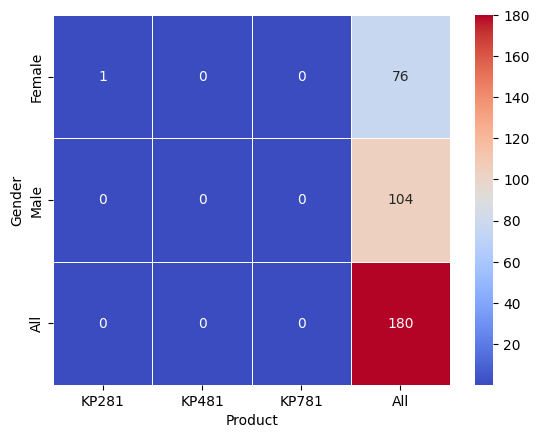

In [35]:
sns.heatmap(df2,cmap='coolwarm',annot=True,fmt='.0f', linewidths=0.5)

### 1. Gender vs Education vs Product

<Axes: xlabel='Gender', ylabel='Education'>

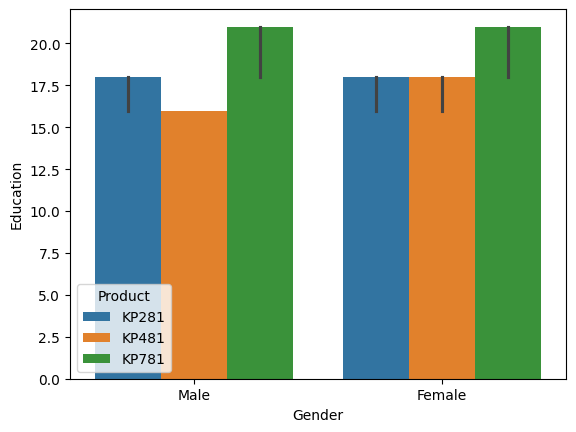

In [36]:
sns.barplot(data=df1,x='Gender',y='Education',hue='Product',estimator='max')

<Axes: xlabel='Gender', ylabel='Education'>

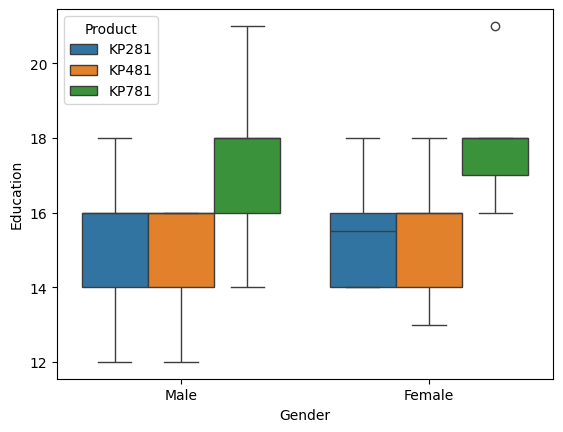

In [37]:
sns.boxplot(data=df1,x='Gender',y='Education',hue='Product')

### 2. Gender vs Usage vs Product

<Axes: xlabel='Gender', ylabel='Usage'>

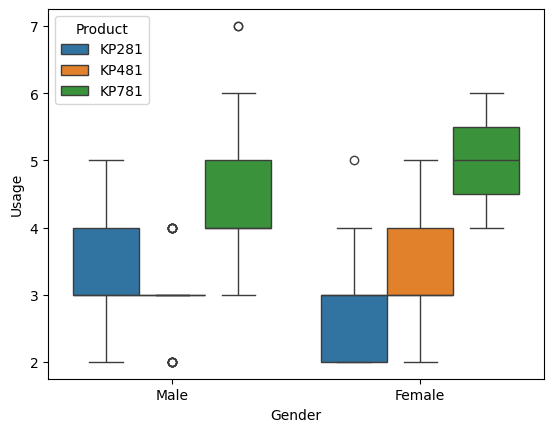

In [38]:
sns.boxplot(data=df1,x='Gender',y='Usage',hue='Product')

### 3. Gender vs Fitness vs Product

<Axes: xlabel='Gender', ylabel='Fitness'>

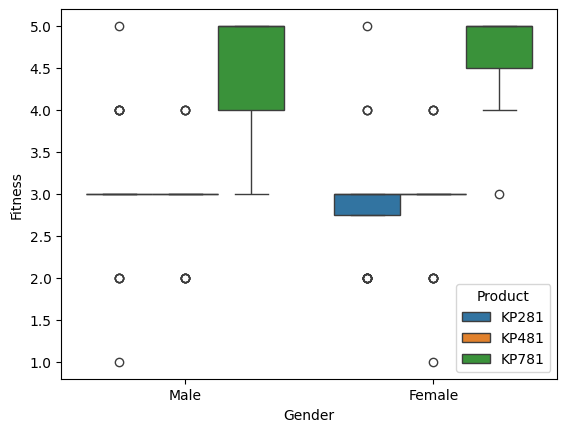

In [39]:
sns.boxplot(data=df1,x='Gender',y='Fitness',hue='Product')

### 4. Gender vs Income vs Product

<Axes: xlabel='Gender', ylabel='Income'>

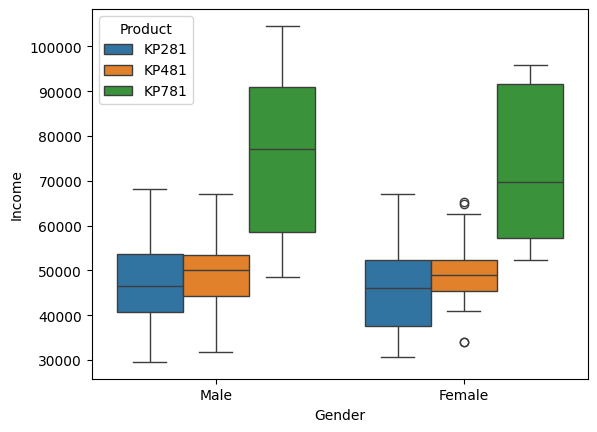

In [40]:
sns.boxplot(data=df1,x='Gender',y='Income',hue='Product')

In [41]:
df1.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


### 5. Gender vs Miles vs Product

<Axes: xlabel='Gender', ylabel='Miles'>

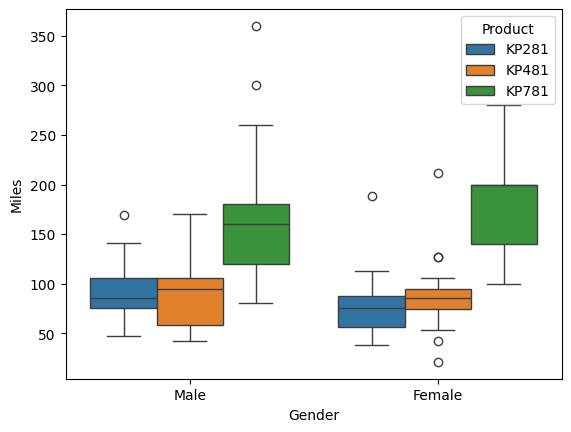

In [42]:
sns.boxplot(data=df1,x='Gender',y='Miles',hue='Product')

# 3.Education

<Axes: xlabel='Education', ylabel='count'>

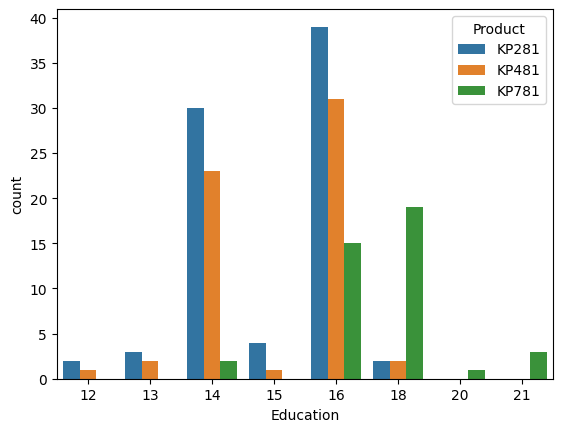

In [43]:
sns.countplot(data=df1,x='Education',hue='Product')

<Axes: xlabel='Education', ylabel='Density'>

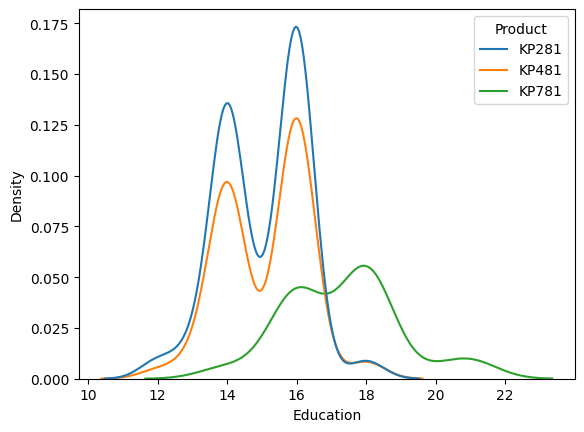

In [44]:
sns.kdeplot(data=df1,x='Education',hue='Product')

### 1. Education vs Marital Status vs Usage

<Axes: xlabel='MaritalStatus', ylabel='Education'>

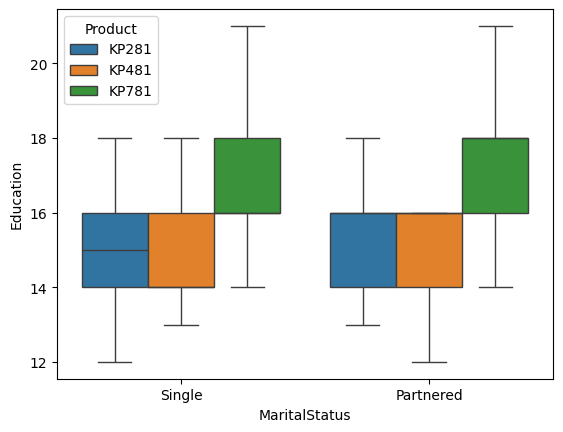

In [45]:
sns.boxplot(data=df1,x='MaritalStatus',y='Education',hue='Product')

### 2 Education vs Product Contigency Table

In [46]:



 ##📌 Step 3: Create a two-way contingency table ( Education vs Product)
contingency_table = pd.crosstab(df1['Education'],df1['Product'], margins=True)
print("Two-Way Contingency Table:\n")
print(contingency_table)

# 📌 Step 4: Compute marginal probabilities
total = contingency_table.loc['All', 'All']
print(total)
marginal_probs = contingency_table / total
print("\n📊 Marginal Probabilities:\n")
print(round(marginal_probs,2))

# 📌 Step 5: Conditional Probabilities
# Probability of Product given Education
cond_prob_product_given_gender =pd.crosstab(df1['Education'],df1['Product'], normalize='index')
print("\n🎯 P(Product | Education):\n")
print(round(cond_prob_product_given_gender,2))

# Probability of Product given Education
cond_prob_gendre_given_product = pd.crosstab(df1['Product'],df1['Education'],normalize='index')
print("\n🌍 P(Education | Product):\n")
print(round(cond_prob_gendre_given_product,2))

Two-Way Contingency Table:

Product    KP281  KP481  KP781  All
Education                          
12             2      1      0    3
13             3      2      0    5
14            30     23      2   55
15             4      1      0    5
16            39     31     15   85
18             2      2     19   23
20             0      0      1    1
21             0      0      3    3
All           80     60     40  180
180

📊 Marginal Probabilities:

Product    KP281  KP481  KP781   All
Education                           
12          0.01   0.01   0.00  0.02
13          0.02   0.01   0.00  0.03
14          0.17   0.13   0.01  0.31
15          0.02   0.01   0.00  0.03
16          0.22   0.17   0.08  0.47
18          0.01   0.01   0.11  0.13
20          0.00   0.00   0.01  0.01
21          0.00   0.00   0.02  0.02
All         0.44   0.33   0.22  1.00

🎯 P(Product | Education):

Product    KP281  KP481  KP781
Education                     
12          0.67   0.33   0.00
13          0.60

### 2. Education vs Usage vs Product Code

### 3. Education vs Fitness vs Product Code

<Axes: xlabel='Education', ylabel='Fitness'>

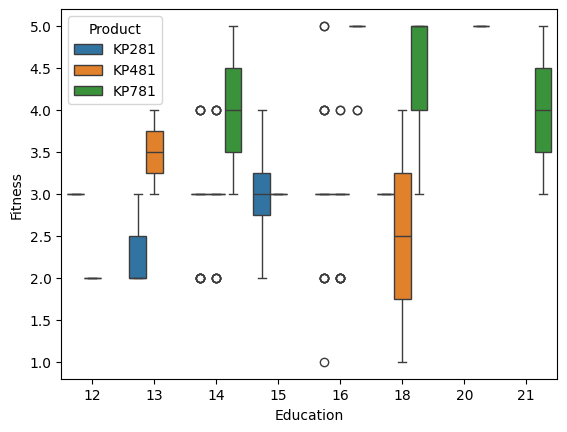

In [47]:
sns.boxplot(data=df1,x='Education',y='Fitness',hue='Product')

### 3. Education vs Income vs Product Code

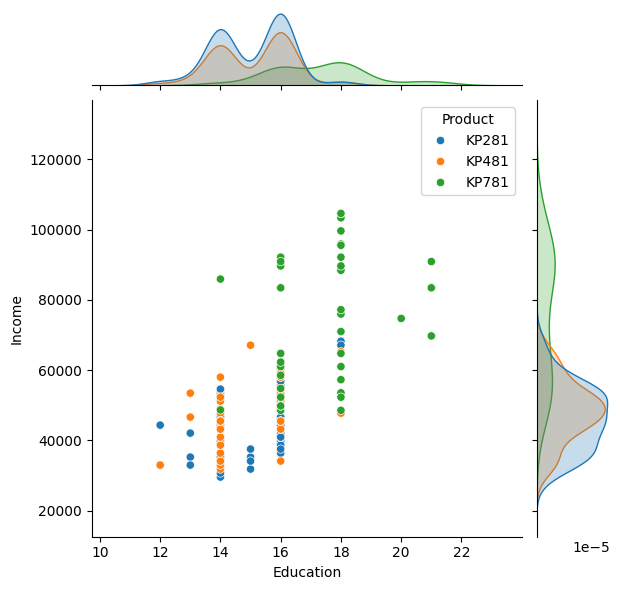

In [48]:
sns.jointplot(data=df1,x='Education',y='Income',hue='Product')

<Axes: xlabel='Education', ylabel='Income'>

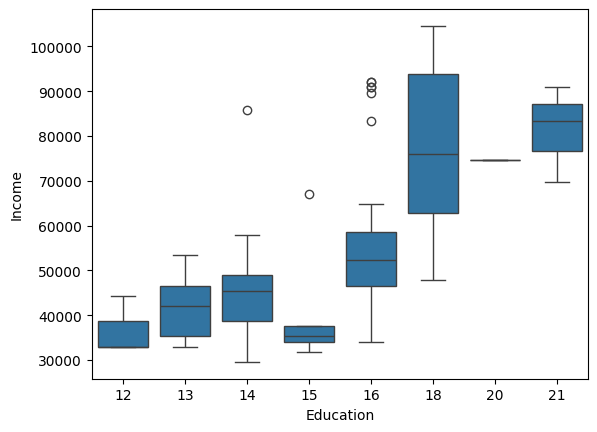

In [49]:
sns.boxplot(data=df1,x='Education',y='Income')

<Axes: xlabel='Education', ylabel='Income'>

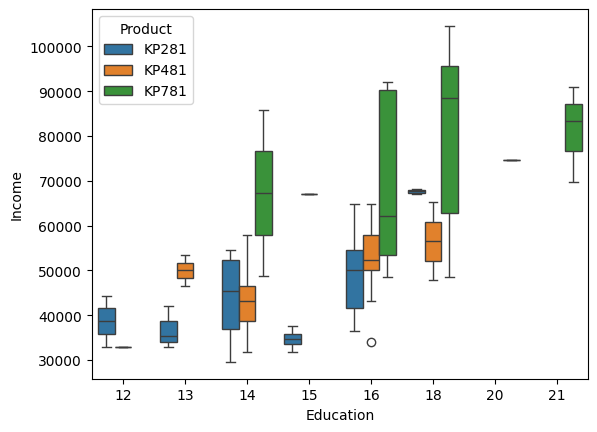

In [50]:
sns.boxplot(data=df1,x='Education',y='Income',hue='Product')

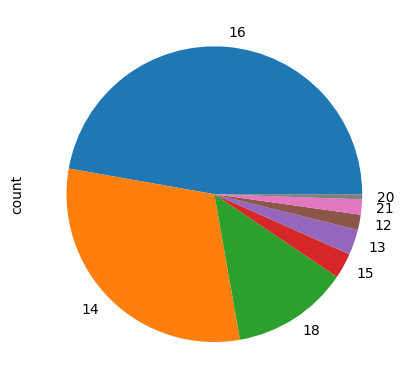

In [51]:
df1['Education'].value_counts().plot.pie()
plt.show()

### 5. Education vs Miles vs Product Code

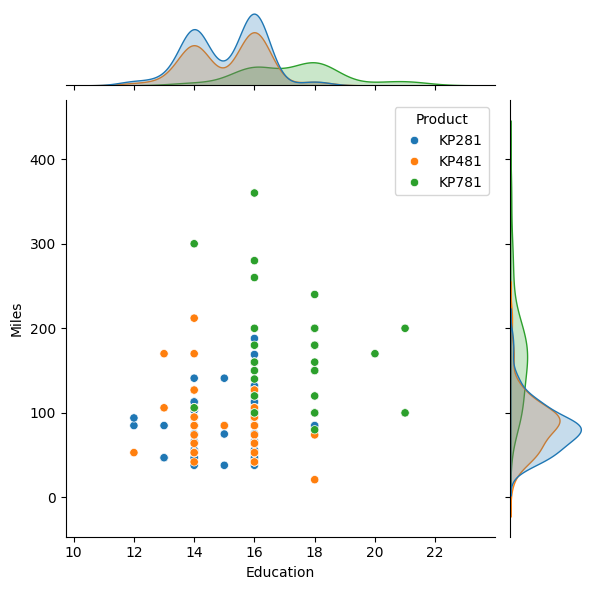

In [52]:
sns.jointplot(data=df1,x='Education',y='Miles',hue='Product')

<Axes: xlabel='Education', ylabel='Miles'>

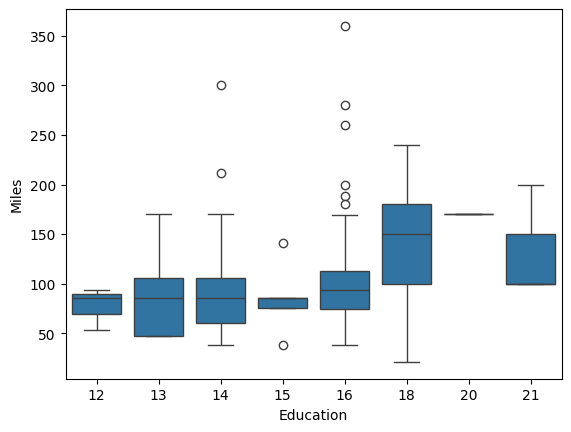

In [53]:
sns.boxplot(data=df1,x='Education',y='Miles')

<Axes: xlabel='Education', ylabel='Miles'>

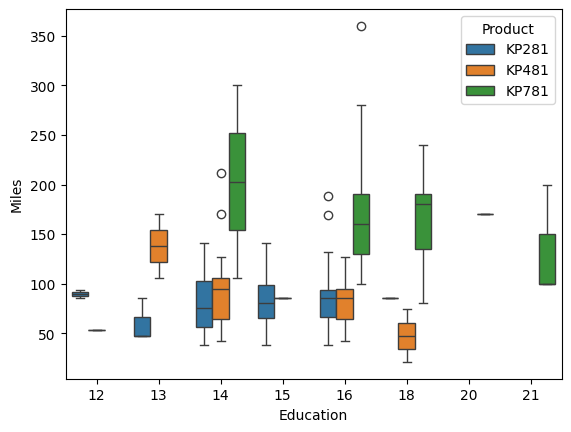

In [54]:
sns.boxplot(data=df1,x='Education',y='Miles',hue='Product')

# 4.Marital Status

### 1. Marital Status vs Product Code Contigency Table

In [55]:

contingency_table = pd.crosstab(df1['MaritalStatus'],df1['Product'], margins=True)
print("Two-Way Contingency Table:\n")
print(contingency_table)

# 📌 Step 4: Compute marginal probabilities
total = contingency_table.loc['All', 'All']
print(total)
marginal_probs = contingency_table / total
print("\n📊 Marginal Probabilities:\n")
print(round(marginal_probs,2))

cond_prob_product_given_marital_status =pd.crosstab(df1['MaritalStatus'],df1['Product'],normalize=True)
print("\n📊 P(Product | MaritalStatus) :\n")
print(round(cond_prob_product_given_marital_status,2))

cond_prob_marital_startus_given_product =pd.crosstab(df1['Product'],df1['MaritalStatus'],normalize=True)
print("\n📊 P(MaritalStatus | Product ) :\n")
print(round(cond_prob_marital_startus_given_product,2))

Two-Way Contingency Table:

Product        KP281  KP481  KP781  All
MaritalStatus                          
Partnered         48     36     23  107
Single            32     24     17   73
All               80     60     40  180
180

📊 Marginal Probabilities:

Product        KP281  KP481  KP781   All
MaritalStatus                           
Partnered       0.27   0.20   0.13  0.59
Single          0.18   0.13   0.09  0.41
All             0.44   0.33   0.22  1.00

📊 P(Product | MaritalStatus) :

Product        KP281  KP481  KP781
MaritalStatus                     
Partnered       0.27   0.20   0.13
Single          0.18   0.13   0.09

📊 P(MaritalStatus | Product ) :

MaritalStatus  Partnered  Single
Product                         
KP281               0.27    0.18
KP481               0.20    0.13
KP781               0.13    0.09


<Axes: xlabel='MaritalStatus', ylabel='count'>

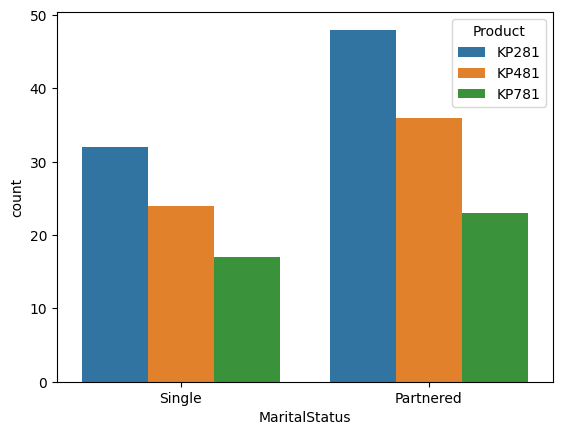

In [56]:
sns.countplot(df1,x='MaritalStatus',hue='Product')

In [57]:
df1["MaritalStatus"].value_counts().reset_index()['MaritalStatus']

,MaritalStatus
0,Partnered
1,Single


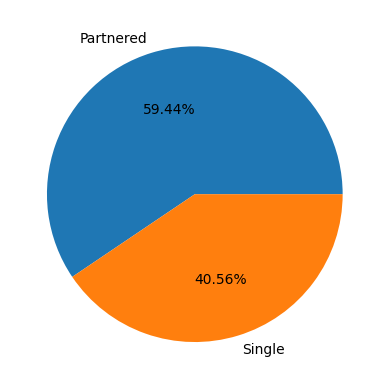

In [58]:
plt.pie(df1["MaritalStatus"].value_counts(),labels=df1["MaritalStatus"].value_counts().index,autopct='%.2f%%')
plt.show()

### 2. Marital Status vs Usage vs Product

In [59]:
contigency_table_for3c=pd.crosstab(index=[df1['MaritalStatus'],df1['Product']],columns=df1['Usage'],margins=True)
contigency_table_for3c

Usage                   2   3   4   5  6  7  All
MaritalStatus Product                           
Partnered     KP281    12  23  12   1  0  0   48
              KP481    10  17   6   3  0  0   36
              KP781     0   0  11   5  5  2   23
Single        KP281     7  14  10   1  0  0   32
              KP481     4  14   6   0  0  0   24
              KP781     0   1   7   7  2  0   17
All                    33  69  52  17  7  2  180

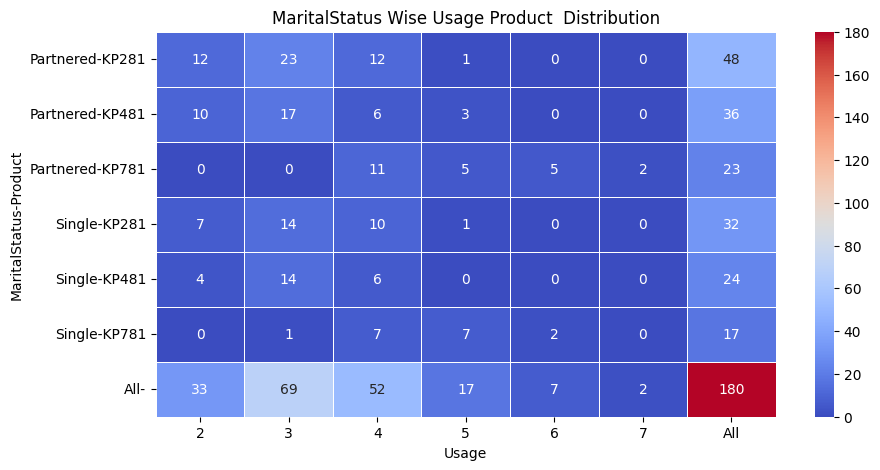

In [60]:
plt.figure(figsize=(10,5))
sns.heatmap(contigency_table_for3c,cmap='coolwarm',annot=True,fmt='.0f', linewidths=0.5)
plt.title('MaritalStatus Wise Usage Product  Distribution')
plt.show()

<Axes: xlabel='MaritalStatus', ylabel='Usage'>

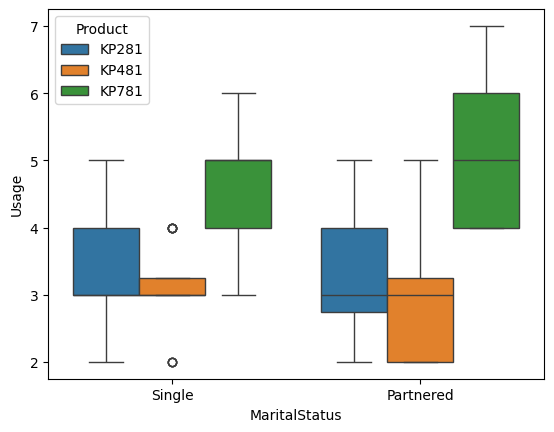

In [61]:
sns.boxplot(df1,x='MaritalStatus',y='Usage',hue='Product')

### 3. MaritalStatus vs Fitness Vs Product **Code**

In [62]:
contigency_table_for3c=pd.crosstab(index=[df1['MaritalStatus'],df1['Product']],columns=df1['Fitness'],margins=True)
contigency_table_for3c

Fitness                1   2   3   4   5  All
MaritalStatus Product                        
Partnered     KP281    1  11  31   4   1   48
              KP481    0   7  25   4   0   36
              KP781    0   0   1   5  17   23
Single        KP281    0   3  23   5   1   32
              KP481    1   5  14   4   0   24
              KP781    0   0   3   2  12   17
All                    2  26  97  24  31  180

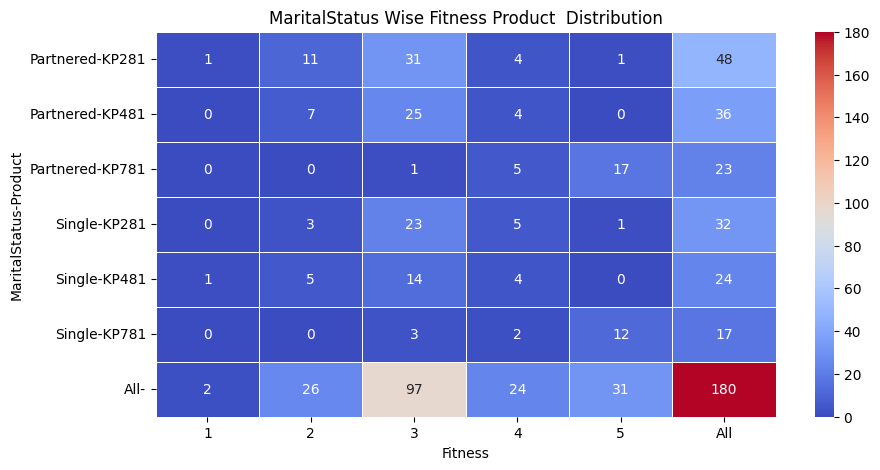

In [63]:
plt.figure(figsize=(10,5))
sns.heatmap(contigency_table_for3c,cmap='coolwarm',annot=True,fmt='.0f', linewidths=0.5)
plt.title('MaritalStatus Wise Fitness Product  Distribution')
plt.show()

<Axes: xlabel='MaritalStatus', ylabel='Fitness'>

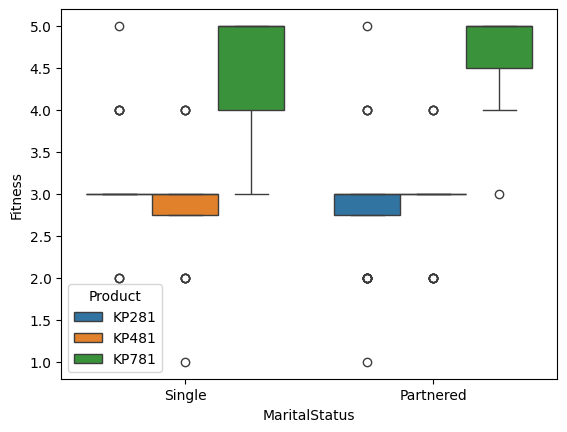

In [64]:
sns.boxplot(df1,x='MaritalStatus',y='Fitness',hue='Product')

In [65]:
df1.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


### 4. Marital Status vs Income vs Product

<Axes: xlabel='MaritalStatus', ylabel='Income'>

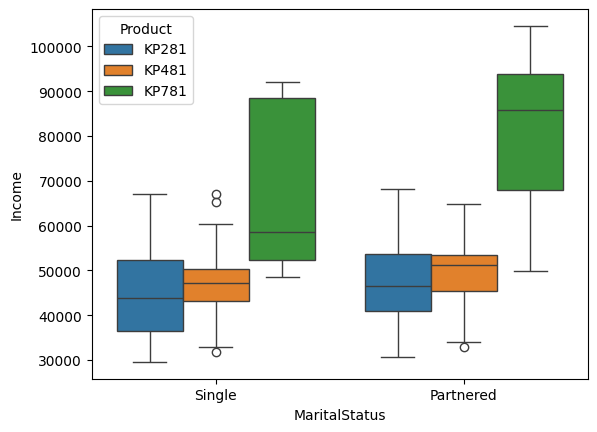

In [66]:
sns.boxplot(data=df1,x='MaritalStatus',y='Income',hue='Product')

### 5. MaritalStatus vs Miles vs Product

<Axes: xlabel='MaritalStatus', ylabel='Miles'>

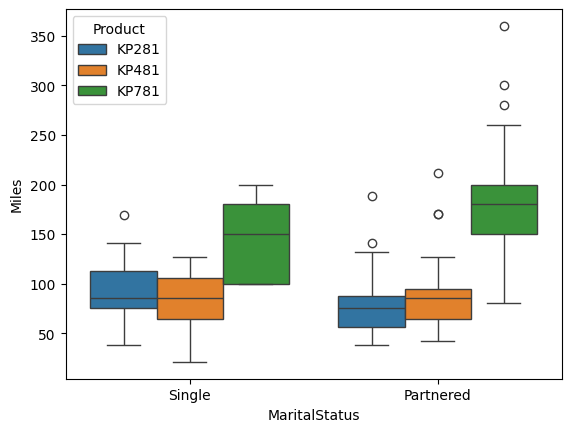

In [67]:
sns.boxplot(data=df1,x='MaritalStatus',y='Miles',hue='Product')

In [68]:
df1.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


# 5.Usage

<Axes: xlabel='Usage', ylabel='count'>

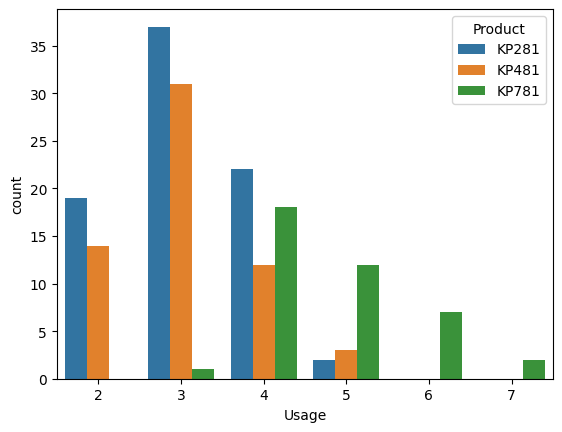

In [69]:
sns.countplot(data=df1,x='Usage',hue='Product')

<Axes: xlabel='Usage', ylabel='Density'>

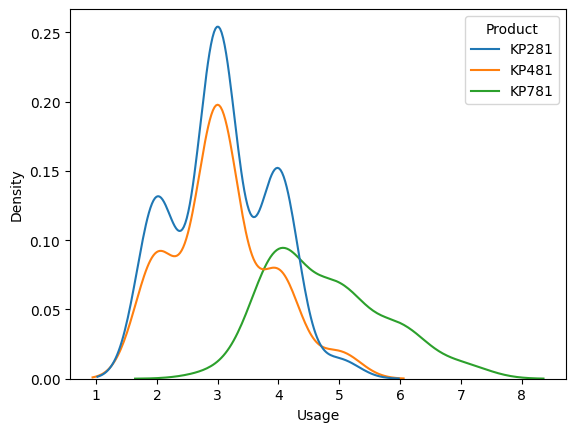

In [70]:
sns.kdeplot(data=df1,x='Usage',hue='Product')

### 1. Usage vs Product Contigency Table

In [71]:



 ##📌 Step 3: Create a two-way contingency table ( Education vs Product)
contingency_table = pd.crosstab(df1['Usage'],df1['Product'], margins=True)
print("Two-Way Contingency Table:\n")
print(contingency_table)

# 📌 Step 4: Compute marginal probabilities
total = contingency_table.loc['All', 'All']
print(total)
marginal_probs = contingency_table / total
print("\n📊 Marginal Probabilities:\n")
print(round(marginal_probs,2))

# 📌 Step 5: Conditional Probabilities
# Probability of Product given Education
cond_prob_product_given_gender =pd.crosstab(df1['Usage'],df1['Product'], normalize='index')
print("\n🎯 P(Product | Education):\n")
print(round(cond_prob_product_given_gender,2))

# Probability of Product given Education
cond_prob_gendre_given_product = pd.crosstab(df1['Product'],df1['Usage'],normalize='index')
print("\n🌍 P(Education | Product):\n")
print(round(cond_prob_gendre_given_product,2))

Two-Way Contingency Table:

Product  KP281  KP481  KP781  All
Usage                            
2           19     14      0   33
3           37     31      1   69
4           22     12     18   52
5            2      3     12   17
6            0      0      7    7
7            0      0      2    2
All         80     60     40  180
180

📊 Marginal Probabilities:

Product  KP281  KP481  KP781   All
Usage                             
2         0.11   0.08   0.00  0.18
3         0.21   0.17   0.01  0.38
4         0.12   0.07   0.10  0.29
5         0.01   0.02   0.07  0.09
6         0.00   0.00   0.04  0.04
7         0.00   0.00   0.01  0.01
All       0.44   0.33   0.22  1.00

🎯 P(Product | Education):

Product  KP281  KP481  KP781
Usage                       
2         0.58   0.42   0.00
3         0.54   0.45   0.01
4         0.42   0.23   0.35
5         0.12   0.18   0.71
6         0.00   0.00   1.00
7         0.00   0.00   1.00

🌍 P(Education | Product):

Usage       2     3     4     5

### 2. Usage vs Fitness vs Product Code

<Axes: xlabel='Usage', ylabel='Fitness'>

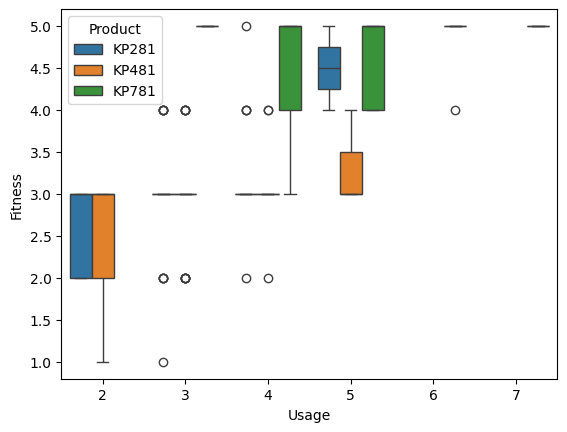

In [72]:
sns.boxplot(data=df1,x='Usage',y='Fitness',hue='Product')

### 3. Usage vs Income vs Product Code

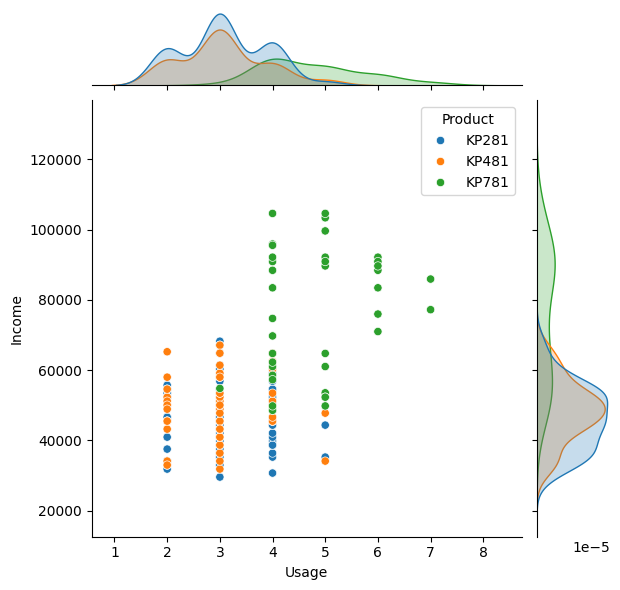

In [73]:
sns.jointplot(data=df1,x='Usage',y='Income',hue='Product')

<Axes: xlabel='Usage', ylabel='Income'>

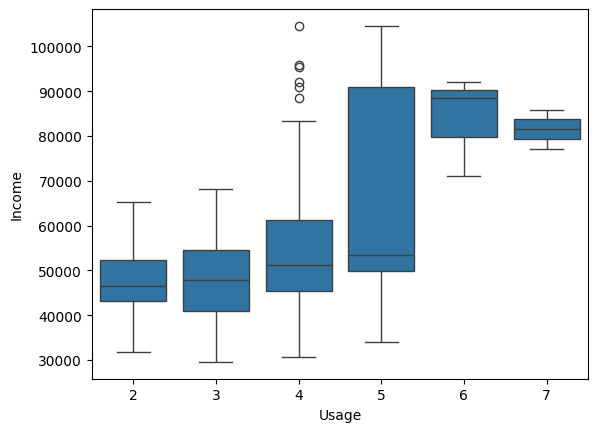

In [74]:
sns.boxplot(data=df1,x='Usage',y='Income')

<Axes: xlabel='Usage', ylabel='Income'>

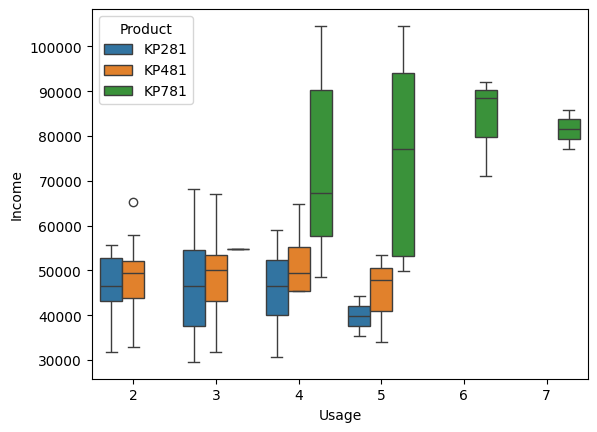

In [75]:
sns.boxplot(data=df1,x='Usage',y='Income',hue='Product')

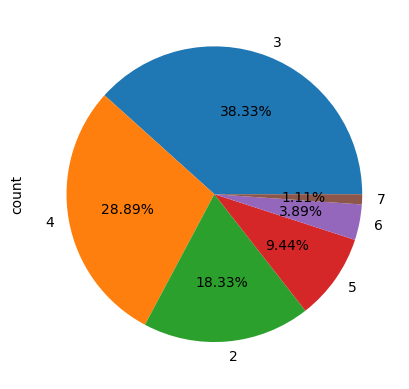

In [76]:
df1['Usage'].value_counts().plot.pie(autopct='%.2f%%')
plt.show()

### 5. Usage vs Miles vs Product Code

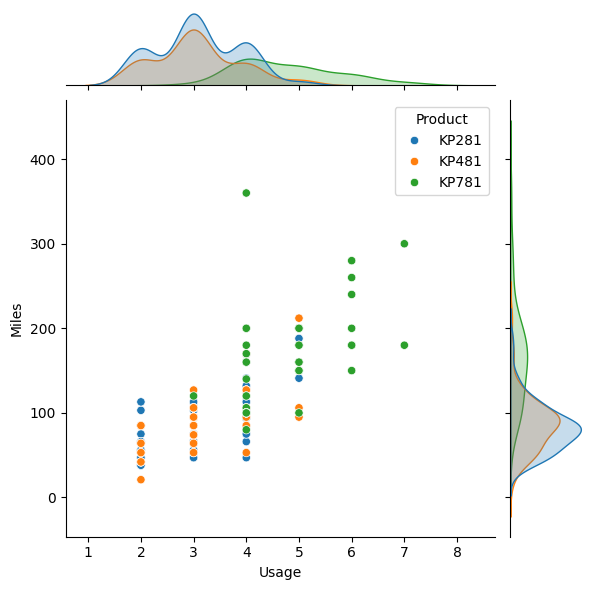

In [77]:
sns.jointplot(data=df1,x='Usage',y='Miles',hue='Product')

<Axes: xlabel='Usage', ylabel='Miles'>

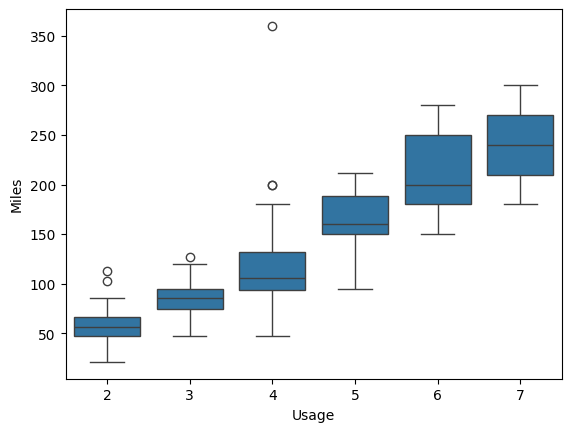

In [78]:
sns.boxplot(data=df1,x='Usage',y='Miles')

<Axes: xlabel='Usage', ylabel='Miles'>

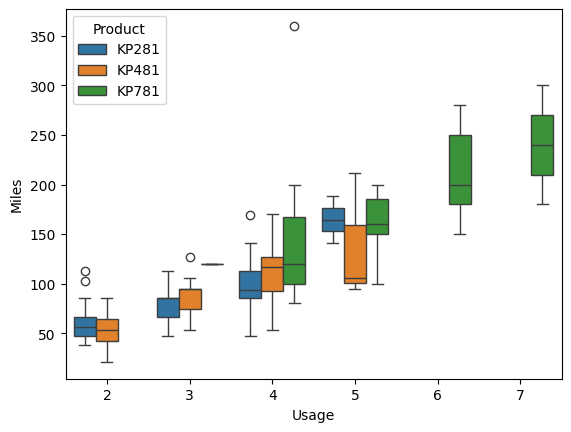

In [79]:
sns.boxplot(data=df1,x='Usage',y='Miles',hue='Product')

In [80]:
df1.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


# 5.Fitnes

<Axes: xlabel='Fitness', ylabel='count'>

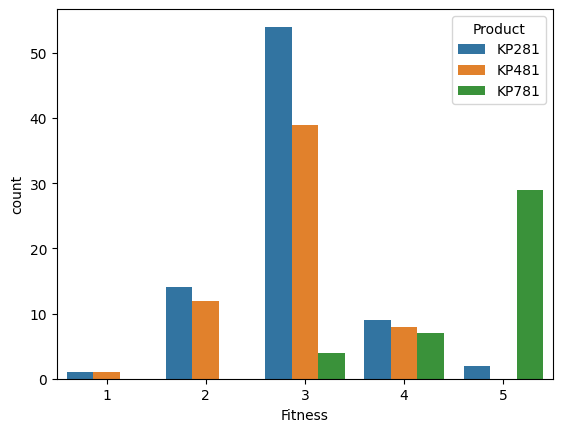

In [81]:
sns.countplot(data=df1,x='Fitness',hue='Product')

<Axes: xlabel='Fitness', ylabel='Density'>

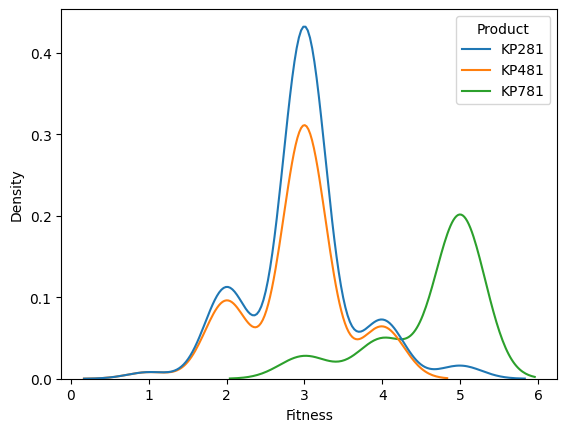

In [82]:
sns.kdeplot(data=df1,x='Fitness',hue='Product')

### 1. Fitnes vs Product Contigency Table

In [83]:



 ##📌 Step 3: Create a two-way contingency table ( Education vs Product)
contingency_table = pd.crosstab(df1['Fitness'],df1['Product'], margins=True)
print("Two-Way Contingency Table:\n")
print(contingency_table)

# 📌 Step 4: Compute marginal probabilities
total = contingency_table.loc['All', 'All']
print(total)
marginal_probs = contingency_table / total
print("\n📊 Marginal Probabilities:\n")
print(round(marginal_probs,2))

# 📌 Step 5: Conditional Probabilities
# Probability of Product given Education
cond_prob_product_given_gender =pd.crosstab(df1['Fitness'],df1['Product'], normalize='index')
print("\n🎯 P(Product | Fitness):\n")
print(round(cond_prob_product_given_gender,2))

# Probability of Product given Education
cond_prob_gendre_given_product = pd.crosstab(df1['Product'],df1['Fitness'],normalize='index')
print("\n🌍 P(Fitness | Product):\n")
print(round(cond_prob_gendre_given_product,2))

Two-Way Contingency Table:

Product  KP281  KP481  KP781  All
Fitness                          
1            1      1      0    2
2           14     12      0   26
3           54     39      4   97
4            9      8      7   24
5            2      0     29   31
All         80     60     40  180
180

📊 Marginal Probabilities:

Product  KP281  KP481  KP781   All
Fitness                           
1         0.01   0.01   0.00  0.01
2         0.08   0.07   0.00  0.14
3         0.30   0.22   0.02  0.54
4         0.05   0.04   0.04  0.13
5         0.01   0.00   0.16  0.17
All       0.44   0.33   0.22  1.00

🎯 P(Product | Fitness):

Product  KP281  KP481  KP781
Fitness                     
1         0.50   0.50   0.00
2         0.54   0.46   0.00
3         0.56   0.40   0.04
4         0.38   0.33   0.29
5         0.06   0.00   0.94

🌍 P(Fitness | Product):

Fitness     1     2     3     4     5
Product                              
KP281    0.01  0.18  0.68  0.11  0.02
KP481    0.02  0.20

<Axes: xlabel='Usage', ylabel='Fitness'>

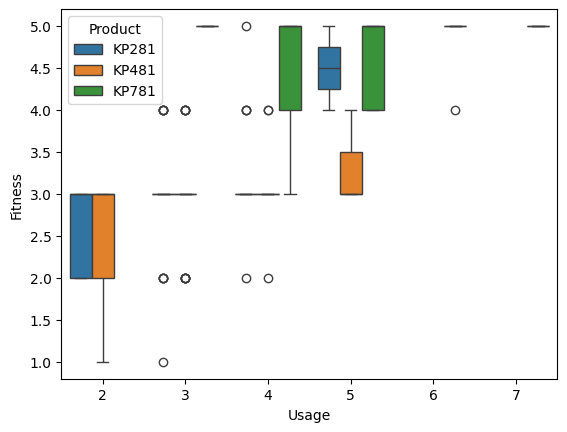

In [84]:
sns.boxplot(data=df1,x='Usage',y='Fitness',hue='Product')

### 3. Fitness vs Income vs Product Code

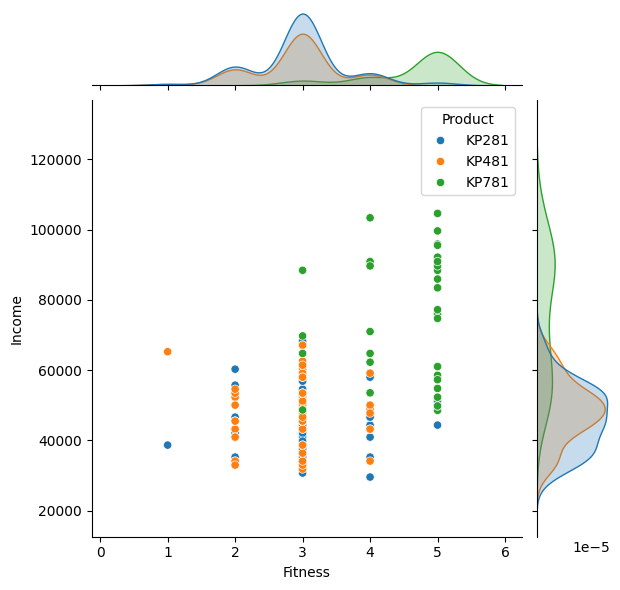

In [85]:
sns.jointplot(data=df1,x='Fitness',y='Income',hue='Product')

<Axes: xlabel='Fitness', ylabel='Income'>

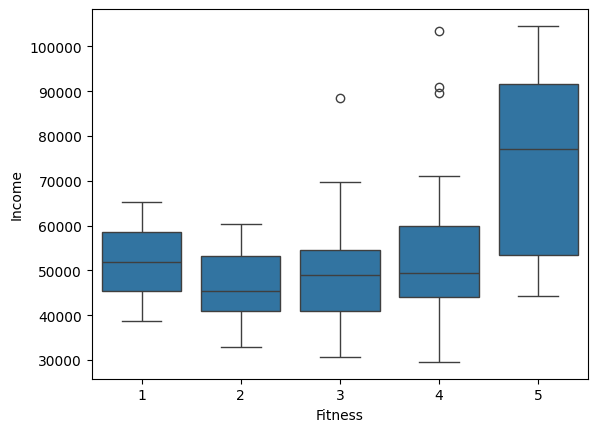

In [86]:
sns.boxplot(data=df1,x='Fitness',y='Income')

<Axes: xlabel='Fitness', ylabel='Income'>

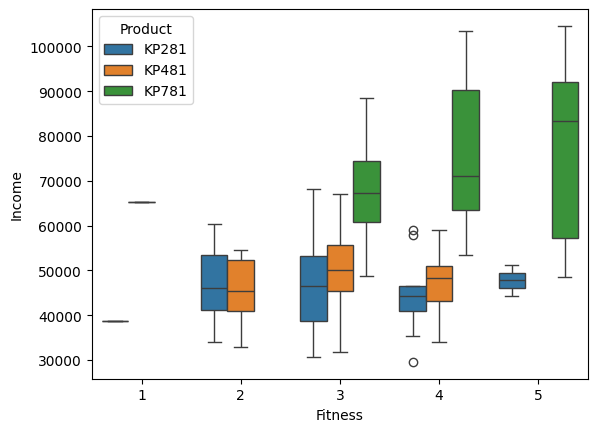

In [87]:
sns.boxplot(data=df1,x='Fitness',y='Income',hue='Product')

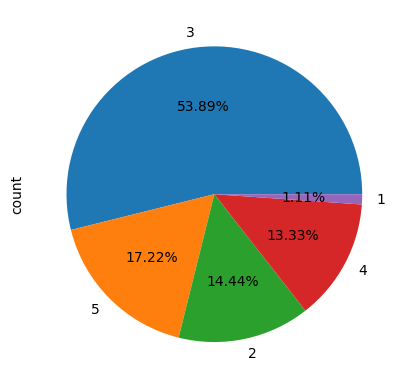

In [88]:
df1['Fitness'].value_counts().plot.pie(autopct='%.2f%%')
plt.show()

### 5. Fitness vs Miles vs Product Code

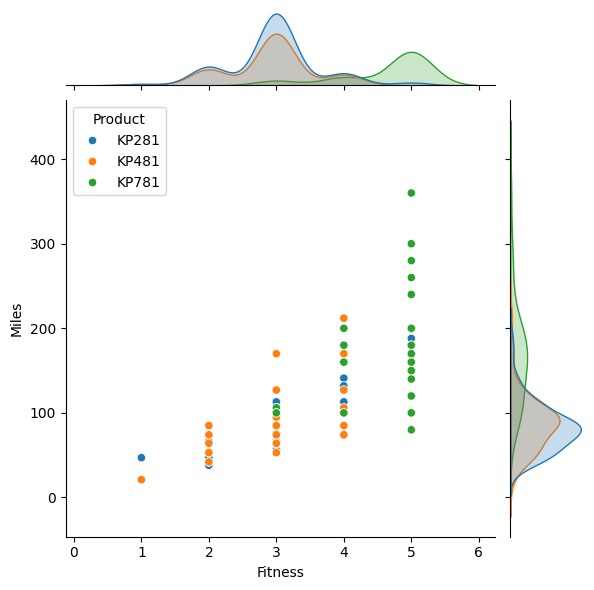

In [89]:
sns.jointplot(data=df1,x='Fitness',y='Miles',hue='Product')

<Axes: xlabel='Fitness', ylabel='Miles'>

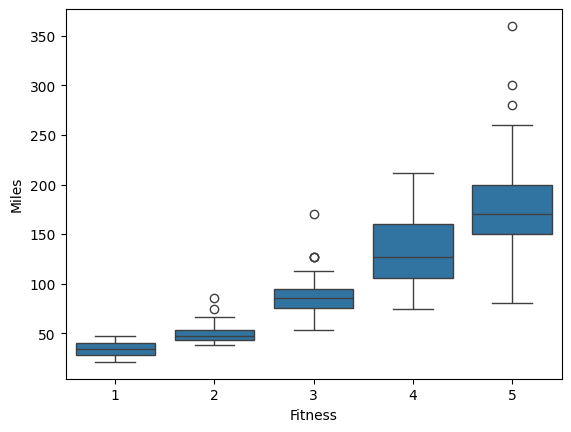

In [90]:
sns.boxplot(data=df1,x='Fitness',y='Miles')

<Axes: xlabel='Fitness', ylabel='Miles'>

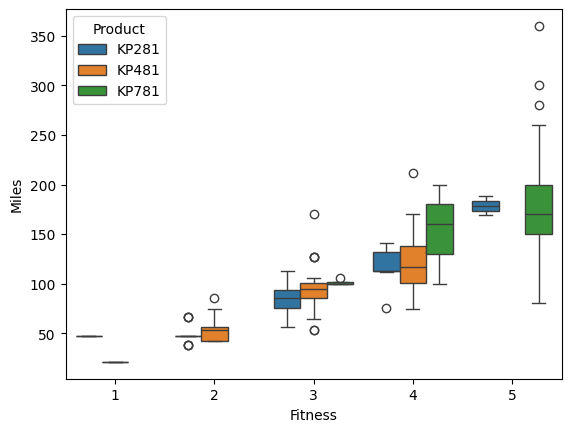

In [91]:
sns.boxplot(data=df1,x='Fitness',y='Miles',hue='Product')

In [92]:
df1.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


# 6.Income

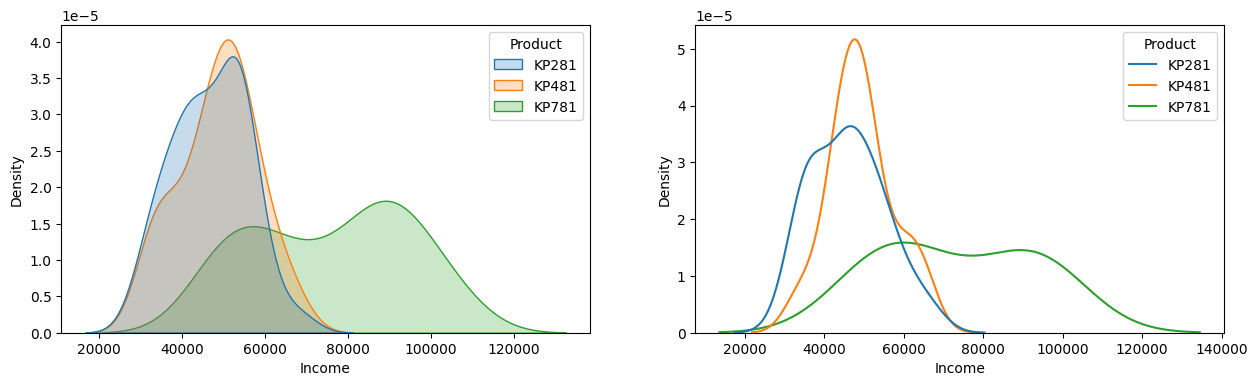

In [93]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)

sns.kdeplot(data=df1[df1['Gender']=='Male'],x='Income',hue='Product', fill=True, common_norm=False)

plt.subplot(1,2,2)
sns.kdeplot(data=df1[df1['Gender']=='Female'],x='Income',hue='Product',  common_norm=False)

plt.show()

In [94]:
df1

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


### 7. Income vs Miles vs Product

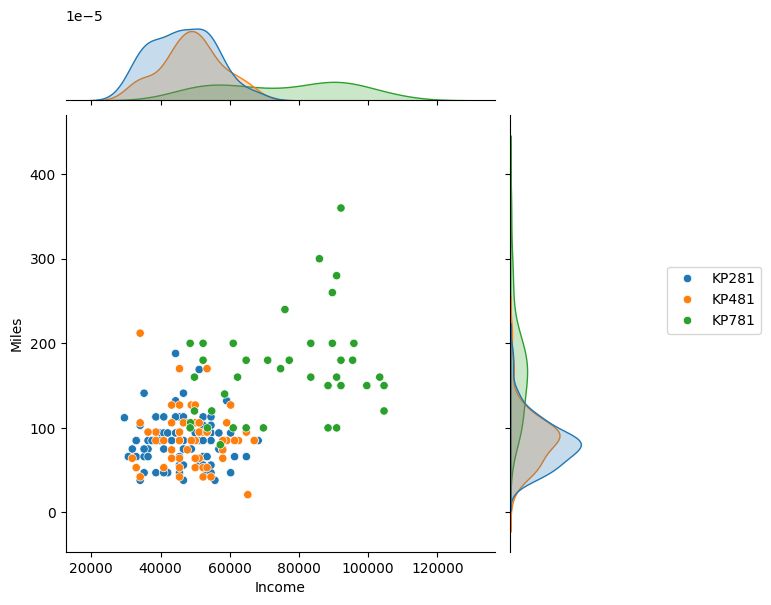

In [95]:
sns.jointplot(data=df1,x='Income',y='Miles',hue='Product')
plt.legend(loc=(1.4,.5))
plt.show()

In [96]:
print('Income Analysis whole dataset')
mean_age=np.mean(df1['Income'])
std_age=np.std(df1['Income'])
zscore20=(20000-mean_age)/std_age
zscore40=(80000-mean_age)/std_age
print("Mean\t",mean_age)
print("Std\t",std_age)
print("Zscore20\t",zscore20)
print("Zscore40\t",zscore40)
CI90=list(norm.interval(confidence=0.90,loc=mean_age,scale=std_age))
P20_40=norm.cdf(zscore40)-norm.cdf(zscore20)
print("CI 90%\t",CI90)
print('Probability between 20K and 80K\t',P20_40)

Income Analysis whole dataset
Mean	 53719.57777777778
Std	 16460.76846490047
Zscore20	 -2.0484813846740213
Zscore40	 1.596548926513385
CI 90%	 [np.float64(26644.023065877813), np.float64(80795.13248967772)]
Probability between 20K and 80K	 0.9245604271772856


In [97]:
print('Overall')
print('Income Analysis for KP281')
mean_age=np.mean(df_KP281['Income'])
std_age=np.std(df_KP281['Income'])
zscore20=(20000-mean_age)/std_age
zscore40=(80000-mean_age)/std_age
print("Mean\t",mean_age)
print("Std\t",std_age)
print("Zscore20\t",zscore20)
print("Zscore40\t",zscore40)
CI90=norm.interval(confidence=0.90,loc=mean_age,scale=std_age)
P20_40=norm.cdf(zscore40)-norm.cdf(zscore20)
print("CI 90%\t",CI90)
print('Probability between 20k and 80k\t',P20_40)

print('\n \n  Male \n')
print('Income Analysis for KP281')
mean_age=np.mean(df_KP281['Income'][df_KP281['Gender']=='Male'])
std_age=np.std(df_KP281['Income'][df_KP281['Gender']=='Male'])
zscore20=(20000-mean_age)/std_age
zscore40=(80000-mean_age)/std_age
print("Mean\t",mean_age)
print("Std\t",std_age)
print("Zscore20\t",zscore20)
print("Zscore40\t",zscore40)
CI90=norm.interval(confidence=0.90,loc=mean_age,scale=std_age)
P20_40=norm.cdf(zscore40)-norm.cdf(zscore20)
print("CI 90%\t",CI90)
print('Probability between 20k and 80k\t',P20_40)

print('\n \n  Female \n')
print('Income Analysis for KP281')
mean_age=np.mean(df_KP281['Income'][df_KP281['Gender']=='Female'])
std_age=np.std(df_KP281['Income'][df_KP281['Gender']=='Female'])
zscore20=(20000-mean_age)/std_age
zscore40=(80000-mean_age)/std_age
print("Mean\t",mean_age)
print("Std\t",std_age)
print("Zscore20\t",zscore20)
print("Zscore40\t",zscore40)
CI90=norm.interval(confidence=0.90,loc=mean_age,scale=std_age)
P20_40=norm.cdf(zscore40)-norm.cdf(zscore20)
print("CI 90%\t",CI90)
print('Probability between 20k and 80k\t',P20_40)

Overall
Income Analysis for KP281
Mean	 46418.025
Std	 9018.881166717689
Zscore20	 -2.929190939724347
Zscore40	 3.7235189575318186
CI 90%	 (np.float64(31583.28560188008), np.float64(61252.764398119914))
Probability between 20k and 80k	 0.9982025395043878

 
  Male 

Income Analysis for KP281
Mean	 46815.975
Std	 8908.913781958776
Zscore20	 -3.0100162215403157
Zscore40	 3.724811555276263
CI 90%	 (np.float64(32162.11585354714), np.float64(61469.83414645285))
Probability between 20k and 80k	 0.9985961007236015

 
  Female 

Income Analysis for KP281
Mean	 46020.075
Std	 9110.157068864126
Zscore20	 -2.8561609644392485
Zscore40	 3.7298945279586375
CI 90%	 (np.float64(31035.20010318124), np.float64(61004.94989681875))
Probability between 20k and 80k	 0.9977602316036961


In [98]:
print('Overall')
print('Income Analysis for KP481')
mean_age=np.mean(df_KP481['Income'])
std_age=np.std(df_KP481['Income'])
zscore20=(20000-mean_age)/std_age
zscore40=(80000-mean_age)/std_age
print("Mean\t",mean_age)
print("Std\t",std_age)
print("Zscore20\t",zscore20)
print("Zscore40\t",zscore40)
CI90=norm.interval(confidence=0.90,loc=mean_age,scale=std_age)
P20_40=norm.cdf(zscore40)-norm.cdf(zscore20)
print("CI 90%\t",CI90)
print('Probability between 20k and 80k\t',P20_40)

print('\n \n  Male \n')
print('Income Analysis for KP481')
mean_age=np.mean(df_KP481['Income'][df_KP481['Gender']=='Male'])
std_age=np.std(df_KP481['Income'][df_KP481['Gender']=='Male'])
zscore20=(20000-mean_age)/std_age
zscore40=(80000-mean_age)/std_age
print("Mean\t",mean_age)
print("Std\t",std_age)
print("Zscore20\t",zscore20)
print("Zscore40\t",zscore40)
CI90=norm.interval(confidence=0.90,loc=mean_age,scale=std_age)
P20_40=norm.cdf(zscore40)-norm.cdf(zscore20)
print("CI 90%\t",CI90)
print('Probability between 20k and 80k\t',P20_40)

print('\n \n  Female \n')
print('Income Analysis for KP481')
mean_age=np.mean(df_KP481['Income'][df_KP481['Gender']=='Female'])
std_age=np.std(df_KP481['Income'][df_KP481['Gender']=='Female'])
zscore20=(20000-mean_age)/std_age
zscore40=(80000-mean_age)/std_age
print("Mean\t",mean_age)
print("Std\t",std_age)
print("Zscore20\t",zscore20)
print("Zscore40\t",zscore40)
CI90=norm.interval(confidence=0.90,loc=mean_age,scale=std_age)
P20_40=norm.cdf(zscore40)-norm.cdf(zscore20)
print("CI 90%\t",CI90)
print('Probability between 20k and 80k\t',P20_40)

Overall
Income Analysis for KP481
Mean	 48973.65
Std	 8581.569793895522
Zscore20	 -3.3762645641605498
Zscore40	 3.6154632246970144
CI 90%	 (np.float64(34858.22379957375), np.float64(63089.07620042625))
Probability between 20k and 80k	 0.9994827083443053

 
  Male 

Income Analysis for KP481
Mean	 48634.25806451613
Std	 9204.059356777321
Zscore20	 -3.1110466539344475
Zscore40	 3.4078161297806067
CI 90%	 (np.float64(33494.927648844314), np.float64(63773.588480187944))
Probability between 20k and 80k	 0.9987404475598468

 
  Female 

Income Analysis for KP481
Mean	 49336.44827586207
Std	 7845.615052860384
Zscore20	 -3.7392158649392924
Zscore40	 3.90836811614387
CI 90%	 (np.float64(36431.5599004996), np.float64(62241.33665122454))
Probability between 20k and 80k	 0.9998612415935302


In [99]:
print('Overall')
print('Income Analysis for KP781')
mean_age=np.mean(df_KP781['Income'])
std_age=np.std(df_KP781['Income'])
zscore20=(20000-mean_age)/std_age
zscore40=(80000-mean_age)/std_age
print("Mean\t",mean_age)
print("Std\t",std_age)
print("Zscore20\t",zscore20)
print("Zscore40\t",zscore40)
CI90=norm.interval(confidence=0.90,loc=mean_age,scale=std_age)
P20_40=norm.cdf(zscore40)-norm.cdf(zscore20)
print("CI 90%\t",CI90)
print('Probability between 60k and 80k\t',P20_40)

print('\n \n  Male \n')
print('Income Analysis for KP781')
mean_age=np.mean(df_KP781['Income'][df_KP781['Gender']=='Male'])
std_age=np.std(df_KP781['Income'][df_KP781['Gender']=='Male'])
zscore20=(20000-mean_age)/std_age
zscore40=(80000-mean_age)/std_age
print("Mean\t",mean_age)
print("Std\t",std_age)
print("Zscore20\t",zscore20)
print("Zscore40\t",zscore40)
CI90=norm.interval(confidence=0.90,loc=mean_age,scale=std_age)
P20_40=norm.cdf(zscore40)-norm.cdf(zscore20)
print("CI 90%\t",CI90)
print('Probability between 60k and 80K\t',P20_40)

print('\n \n  Female \n')
print('Income Analysis for KP781')
mean_age=np.mean(df_KP781['Income'][df_KP781['Gender']=='Female'])
std_age=np.std(df_KP781['Income'][df_KP781['Gender']=='Female'])
zscore20=(60000-mean_age)/std_age
zscore40=(100000-mean_age)/std_age
print("Mean\t",mean_age)
print("Std\t",std_age)
print("Zscore20\t",zscore20)
print("Zscore40\t",zscore40)
CI90=norm.interval(confidence=0.90,loc=mean_age,scale=std_age)
P20_40=norm.cdf(zscore40)-norm.cdf(zscore20)
print("CI 90%\t",CI90)
print('Probability between 60k and 80k\t',P20_40)

Overall
Income Analysis for KP781
Mean	 75441.575
Std	 18273.049633117484
Zscore20	 -3.0340625190181436
Zscore40	 0.2494616438702416
CI 90%	 (np.float64(45385.08303550242), np.float64(105498.06696449756))
Probability between 60k and 80k	 0.5972917244216246

 
  Male 

Income Analysis for KP781
Mean	 75825.0303030303
Std	 18389.871234714636
Zscore20	 -3.0356400863562962
Zscore40	 0.22702549918286477
CI 90%	 (np.float64(45576.383903439375), np.float64(106073.67670262122))
Probability between 60k and 80K	 0.5885979143756306

 
  Female 

Income Analysis for KP781
Mean	 73633.85714285714
Std	 17599.77087049367
Zscore20	 -0.7746610591229088
Zscore40	 1.498095801994
CI 90%	 (np.float64(44684.81019301075), np.float64(102582.90409270352))
Probability between 60k and 80k	 0.7136758356867025


# Market Research Report: AeroFit Treadmills Target Audience Analysis


**1. Product Market Share:**

1.KP781: 22.2%

2.KP481: 33.3%

3.KP281: 44.4%

**2. Age Distribution Analysis:**

**Overall Age Analysis (All Products):**

a)The mean age of customers for the entire dataset is 28.78, with a standard deviation of 6.88.

b)90% Confidence Interval for age: [17, 40].

**Age Distribution for Each Treadmill Model:**



**1.KP781:**

a)Mean age: 29.1 years

b)Z-scores for 20 and 40 years: -1.32 and 1.58 respectively.

c)90% Confidence Interval for age: [17.78, 40.42].

d)Probability of being between ages 20 and 40: 85%.

**2.KP481:**

a)Mean age: 28.9 years

b)Z-scores for 20 and 40 years: -1.35 and 1.68 respectively.

c)90% Confidence Interval for age: [18.06, 39.74].

d)Probability of being between ages 20 and 40: 86%.

**3.KP281:**

a)Mean age: 28.55 years

b)Z-scores for 20 and 40 years: -1.19 and 1.60 respectively.

c)90% Confidence Interval for age: [16.75, 40.35].

d)Probability of being between ages 20 and 40: 83%.

**3.Gender Breakdown:**

a)Male customers show a slightly higher mean age for KP781 and KP481, while Female customers for KP781 have a significantly lower mean age (27 years) compared to males.

b)Female customers for all products tend to fall closer to the lower end of the age distribution.

**4. Marital Status Distribution:**

**1.Overall Marital Status:**

a)Married: 59% of customers

b)Unmarried: 41% of customers

**2.Marital Status and Average Age:**

a)Married customers have an average age of 30, 28, 26 for KP481, KP781, and KP281, respectively.

b)Unmarried customers have a consistent average age of 25 across all products.

**3.Two-Way Contingency Table for Product vs. Marital Status:**

a)Partnered customers are more likely to purchase KP281 (27% of partnered customers), followed by KP481 (20%) and KP781 (13%).

b)Single customers are more likely to purchase KP281 (18%) and KP481 (13%).

**5. Education Level Analysis:**

1)The education level distribution across the three products reveals that customers with a high school diploma (Education Level 12) are primarily purchasing KP281, while customers with a higher education level (16+) are more likely to buy KP481 and KP781.

**2)Two-Way Contingency Table (Education vs. Product):**

a)Customers with education levels 12-13 show a higher preference for KP281 and KP481.

b)Customers with higher education levels (16+) are more concentrated in the KP781 category.

**6.Fitness Level and Usage:**

***1)Fitness Level Analysis:***

a)KP781 is most popular among users with a fitness level of 4-5.

b)KP281 and KP481 are used more by individuals rating their fitness as 2-3.

***2)Usage Frequency:***


c)KP781 sees higher usage (4-5 times per week) among customers with higher fitness ratings.

d)KP281 and KP481 are used more by customers with fitness ratings of 2-3, with KP281 seeing occasional usage from customers rating their fitness at 4.5-5.

***3)Usage vs. Product Insights:***

a)Customers who use the treadmill 4-5 times per week tend to favor KP781, especially if their fitness rating is 4-5.
b)KP281 and KP481 customers show a preference for using their treadmills less frequently, usually 2-3 times per week.

**7. Income Distribution and Correlation with Usage:**

***Overall Income Analysis (All Products):***

a)Mean income: $53,719 (with a standard deviation of $16,460).

b)90% Confidence Interval for income: [26,644, 80,795].

c)Probability of income between $20K and $80K: 92.5%.

***Income Analysis for Each Treadmill Model:***

**1)KP781:**

a)Mean income: $75,441.58

b)Customers with higher income show greater usage frequency, with higher fitness ratings also correlating to higher income.

**2)KP481:**

a)Mean income: $48,973.65

b)Customers purchasing KP481 are generally more likely to fall within the middle-income range (20K-80K).

**3)KP281:**

a)Mean income: $46,418.03

b)Customers purchasing KP281 are generally lower-income, with a high probability of earning between $20K and $80K.

**8. Recommendations for Customer Targeting:**

***a.KP781 should be marketed towards individuals who are more fitness-focused, with higher incomes and a preference for frequent treadmill usage (4-5 times per week). These individuals tend to have higher fitness ratings (4-5) and may have advanced education levels.***

***b.KP481 is well-suited for a middle-income demographic who use the treadmill 2-3 times per week and generally have a fitness rating of 2-3. This product should be targeted at individuals in the 25-40 age range.***

***c.KP281 attracts customers with lower incomes, lower fitness ratings, and less frequent usage (1-2 times per week). This treadmill model is ideal for individuals with limited fitness goals or those starting their fitness journey.***


In [102]:
std=1/np.sqrt(32)
std

np.float64(0.17677669529663687)

In [103]:
norm.cdf((3.5-3)/std)-norm.cdf((2.5-3)/std)

np.float64(0.9953222650189528)

In [33]:
from scipy.stats import poisson
from scipy.stats import expon
from scipy.stats import geom

In [41]:
1-geom.cdf(k=6,p=0.2)

AttributeError: 'geom_gen' object has no attribute 'pdf'

In [57]:
1-expon.cdf(x=6,scale=2)

np.float64(0.04978706836786395)

In [10]:
expon.cdf(x=0.5,scale=0.25)

np.float64(0.8646647167633873)

In [21]:
poisson.pmf(k=1,mu=500/365)

np.float64(0.3481394124789597)

In [13]:
expon.cdf(x=20,scale=50)

np.float64(0.3296799539643607)

In [122]:
perweek=500/365
perweek

1.36986301369863

In [7]:
poisson.pmf(k=10,mu=14/15)

np.float64(5.435796840825845e-08)